In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-76.52399228272682 -111.92371170126339
62.58961900764237 58.27984317175407
11.708478609754096 10.593865089941971
-9.109735119497714 -9.370599253856085
43.728243079260636 90.01819512576736
-53.37316140312348 -9.109771070192977
-38.55056104927679 134.79147074723193
-73.66501283782927 11.384389957828375
12.450643993752749 -43.00281183116866
9.291339583039118 -155.1676699968896
62.891786722163545 -23.1485841442113
79.25907278260257 1.4849586692878916
86.57660168293745 -127.76504961059544
59.61132841920036 -85.30112399926901
-17.32088049200692 54.48802077327747
-19.728377784613315 128.74611623526374
-75.21217697250371 -179.69249113514425
23.160657773261093 21.149901806695738
37.13826222265756 52.50550606423545
-7.144512396349796 -116.71634352985089
-60.58096247929413 -68.4657726490517
88.84526445076943 -68.24141177646271
-32.83244967744246 105.2869098753282
-24.776082369672167 103.86845375213437
51.76818859904387 -129.00902694599463
-75.02129474262296 147.31348291113244
-21.515134693810907 

74.7044810985931 40.60902056547482
-67.66520355997616 118.87384543733862
32.10328990502583 68.49778989107551
54.874686026504094 -173.49273991456678
73.33095487020239 97.749436495454
-3.586365214572382 161.3659403544516
67.98980997922956 123.48671914347358
57.82313480993852 156.1148517544961
-60.536734280798605 40.87656694318332
-70.10463228969897 -112.4379425252314
-86.36300189395627 -123.46525058264169
61.2023517441186 124.76788881984572
29.491372553285444 28.64104020902377
-69.54504001823906 -29.705884684776123
-8.539037902372385 -27.92200972918033
33.187731000822225 163.5988926436337
-51.27436330457222 -116.51625437846383
-28.487515204141886 -67.64599811551355
51.6343305837234 -150.3241825927358
-48.58561830608264 112.76835126601691
-53.3459490253723 -161.43083648258215
43.481859204262804 -91.03165155251058
-3.748724008280348 -128.60374202932113
87.90049012020177 -139.51358425246883
-59.32048029249211 -114.80086803635191
86.78560846934869 -164.3321667873704
78.61221885127298 91.7423

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

589

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | vuktyl
Processing Record 3 of Set 1 | azare
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | urumqi
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | grindavik
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | saint-denis
Processing Record 16 of Set 1 | kununurra
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | fereydun kenar
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | busselton


Processing Record 38 of Set 4 | kamenka
Processing Record 39 of Set 4 | el balyana
City not found. Skipping...
Processing Record 40 of Set 4 | kiama
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | chuy
Processing Record 43 of Set 4 | malu mare
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | kerman
Processing Record 46 of Set 4 | coos bay
Processing Record 47 of Set 4 | tignere
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | red bluff
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | eureka
Processing Record 3 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 4 of Set 5 | xinxiang
Processing Record 5 of Set 5 | umm lajj
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | sao gabriel da cachoeira
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | lorengau
Processing Record 10 of Set 5 | la ronge
Pro

Processing Record 31 of Set 8 | bergen
Processing Record 32 of Set 8 | chagda
City not found. Skipping...
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | kedrovyy
Processing Record 35 of Set 8 | passo fundo
Processing Record 36 of Set 8 | quincy
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | auki
Processing Record 39 of Set 8 | laguna
Processing Record 40 of Set 8 | nouadhibou
Processing Record 41 of Set 8 | yulara
Processing Record 42 of Set 8 | saint-joseph
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | beeville
Processing Record 45 of Set 8 | koumac
Processing Record 46 of Set 8 | basco
Processing Record 47 of Set 8 | tanout
Processing Record 48 of Set 8 | spring valley
Processing Record 49 of Set 8 | turayf
Processing Record 50 of Set 8 | maguling
Processing Record 1 of Set 9 | kulhudhuffushi
Processing Record 2 of Set 9 | bossembele
City not found. Skipping...
Processing Record 3 of Set 9 | rio gallego

Processing Record 18 of Set 12 | tenextatiloyan
City not found. Skipping...
Processing Record 19 of Set 12 | kuala terengganu
Processing Record 20 of Set 12 | catamarca
Processing Record 21 of Set 12 | hailar
Processing Record 22 of Set 12 | kaduqli
Processing Record 23 of Set 12 | inuvik
Processing Record 24 of Set 12 | itacarambi
Processing Record 25 of Set 12 | petrolina de goias
Processing Record 26 of Set 12 | fort nelson
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | provost
Processing Record 29 of Set 12 | kuznetsk
Processing Record 30 of Set 12 | carroll
Processing Record 31 of Set 12 | sinjar
Processing Record 32 of Set 12 | xining
Processing Record 33 of Set 12 | high level
Processing Record 34 of Set 12 | linchuan
City not found. Skipping...
Processing Record 35 of Set 12 | cocobeach
Processing Record 36 of Set 12 | tiznit
Processing Record 37 of Set 12 | mandalgovi
Processing Record 38 of Set 12 | ouango
Processing Record 39 of Set 12 | nizhnyaya t

In [14]:
len(city_data)

540

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,33.91,86,20,27.63,CL,2022-07-18 00:48:04
1,Vuktyl,63.8567,57.3094,61.52,87,52,0.20,RU,2022-07-18 00:50:34
2,Azare,11.6765,10.1948,71.53,88,100,4.36,NG,2022-07-18 00:50:34
3,Georgetown,5.4112,100.3354,84.13,91,20,3.44,MY,2022-07-18 00:49:00
4,Urumqi,43.8010,87.6005,81.55,23,20,15.66,CN,2022-07-18 00:50:35
5,Cape Town,-33.9258,18.4232,59.88,88,75,12.66,ZA,2022-07-18 00:46:16
6,Port Lincoln,-34.7333,135.8667,54.09,64,100,7.16,AU,2022-07-18 00:47:37
7,Hermanus,-34.4187,19.2345,51.80,82,2,6.58,ZA,2022-07-18 00:50:35
8,Cayenne,4.9333,-52.3333,83.08,1,100,0.00,GF,2022-07-18 00:50:35
9,Hilo,19.7297,-155.0900,91.27,71,100,10.36,US,2022-07-18 00:50:36


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-07-18 00:48:04,-53.1500,-70.9167,33.91,86,20,27.63
1,Vuktyl,RU,2022-07-18 00:50:34,63.8567,57.3094,61.52,87,52,0.20
2,Azare,NG,2022-07-18 00:50:34,11.6765,10.1948,71.53,88,100,4.36
3,Georgetown,MY,2022-07-18 00:49:00,5.4112,100.3354,84.13,91,20,3.44
4,Urumqi,CN,2022-07-18 00:50:35,43.8010,87.6005,81.55,23,20,15.66
5,Cape Town,ZA,2022-07-18 00:46:16,-33.9258,18.4232,59.88,88,75,12.66
6,Port Lincoln,AU,2022-07-18 00:47:37,-34.7333,135.8667,54.09,64,100,7.16
7,Hermanus,ZA,2022-07-18 00:50:35,-34.4187,19.2345,51.80,82,2,6.58
8,Cayenne,GF,2022-07-18 00:50:35,4.9333,-52.3333,83.08,1,100,0.00
9,Hilo,US,2022-07-18 00:50:36,19.7297,-155.0900,91.27,71,100,10.36


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658158560.480556

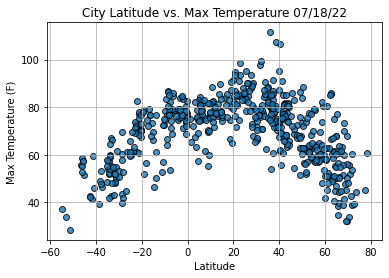

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

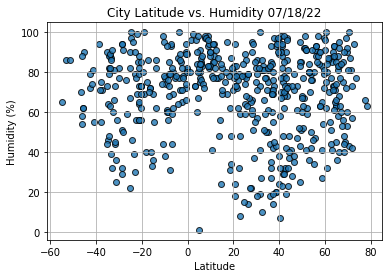

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

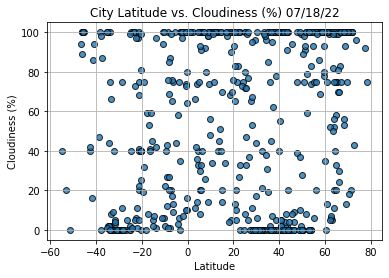

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

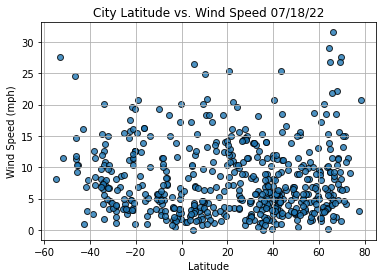

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()